# Problema 2

## Duración del día

Calcular la duración máxima y mínima del día en Sapporo (Japón)
con latitud φ = 43° 03’ 43’’ y longitud L = 141° 21′ 16′′ E.

Considerar la **oblicuidad de la eclíptica ε = 23° 26’ 12’’**.

## Planteamiento

Podemos calcular la longitud del día, calculando la diferencia entre el ángulo horario del ocaso y del orto y convirtiendo el ángulo de tiempo sidéreo a tiempo en segundos SI. La precisión del resultado es del orden de minutos (no se incluye refracción y otros efectos).

Dado que el la latitud del lugar está por encima del ecuador y por debajo del círculo polar, habrá ortos y ocasos todos los días.

Las declinaciones máxima y mínima serán:

$ \delta_M = \epsilon $

$ \delta_m = -\epsilon $

In [1]:
from astropy.coordinates import Angle
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eps = Angle("23d26m12s")

dec_M = eps
dec_m = -eps

lat = Angle("43d03m43s")

Calculamos el ángulo horario $H$

$\cos H = - \tan \delta \tan \phi $

$H$ como función de $\delta$ varía de manera monótona. Se puede ver derivando $H$ respecto a $\delta$ y viendo que la derivada no se anula (salvo para el caso particular de $\phi=0$).

$\dot{H} \sin H = \sec^2 \delta \tan \phi $

Gráficamente se ve así:

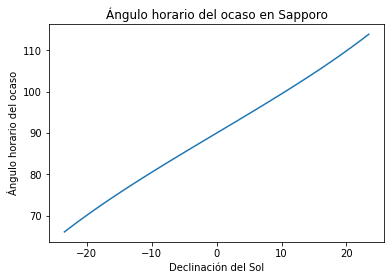

In [3]:
x_delta = np.linspace(dec_m, dec_M)
y_ha = np.arccos(-np.tan(x_delta) * np.tan(lat))

plt.plot(x_delta, y_ha.to_value('deg'))
plt.title("Ángulo horario del ocaso en Sapporo")
plt.xlabel("Declinación del Sol")
plt.ylabel("Ángulo horario del ocaso");

In [4]:
cos_h_M = -np.tan(dec_M) * np.tan(lat)
h_M = Angle(np.arccos(cos_h_M))
cos_h_m = -np.tan(dec_m) * np.tan(lat)
h_m = Angle(np.arccos(cos_h_m))

print('Ángulo horario para la declinación máxima:', h_M.deg, 'grados')
print('Angulo horario para la declinación mínima:', h_m.deg, 'grados')

Ángulo horario para la declinación máxima: 113.89871805346952 grados
Angulo horario para la declinación mínima: 66.10128194653048 grados


Podemos estimar el tiempo sobre el horizonte usando el TSL o bien el ángulo horario. Además, dada la periodicidad del coseno se cumple que:

$H_2 = - H_1$

luego:

$\mathrm{TSL_1} - \mathrm{TSL_2} = H_1 - H_2 = 2 H_1$


## Tiempo entre orto y ocaso

Se puede calcular de manera aproximada (con precisión de minutos) el tiempo que es visible un objeto como la diferencia entre el TSL de su ocaso y su orto, convirtiendo la escala de tiempo sidéro a tiempo universal.

$ \Delta \mathrm{TSL} = 1.0027379091 \Delta t$

In [5]:
# Convertimos tiempo sidéreo a tiempo TU
tsid_tu = 1.0027379091 * u.hourangle / u.hour
print('Escala:', tsid_tu)

Escala: 1.0027379091 hourangle / h


In [6]:
delta_T_M = 2 * h_M / tsid_tu # Tiempo sobre el horizonte máximo
delta_T_m = 2 * h_m / tsid_tu # Tiempo sobre el horizonte mínimo

In [7]:
print('T max=', delta_T_M.to("hour"), 'T min=', delta_T_m.to("hour"))

T max= 15.145030024937556 h T min= 8.789439572946728 h


## Bonus

Podemos calcular la duración del día para todos los días del año. Para ello tenemos que calcular las coordenadas eclípticas del Sol, luego las ecuatoriales y aplicar las ecuaciones anteriores para la duración del día.

In [8]:
# Modelo para la longitud eclíptica del Sol
# https://www.aa.quae.nl/en/reken/zonpositie.html
M0 = 357.5291
M1 = 0.98560028

# Días del año
tm = np.arange(0, 366)
# Anomalía media
M = Angle(M0 + M1 * tm, unit='deg')

C1 = Angle(1.9148, unit='deg')
C2 = Angle(0.0200, unit='deg')
C3 = Angle(0.0003, unit='deg')
C = C1 * np.sin(M) + C2 * np.sin(2*M) + C3 * np.sin(3*M)

peri = Angle(102.9373, unit='deg')

mean_l = peri + M + Angle(180, unit='deg')
lon = mean_l + C
# latitud eclíptica del Sol ~ 0

In [9]:
# Conversión a coordenadas ecuatoriales
sin_d = np.sin(eps) * np.sin(lon)
dec = Angle(np.arcsin(sin_d))
cos_d = np.cos(dec)

cos_a = np.cos(lon) / cos_d
sin_a = np.cos(eps) * np.sin(lon) / cos_d
ra = Angle(np.arctan2(sin_a, cos_a))

In [10]:
cos_h_all = -np.tan(dec) * np.tan(lat)
h_all = Angle(np.arccos(cos_h_all))
delta_T_all = 2 * h_all.hour / tsid_tu

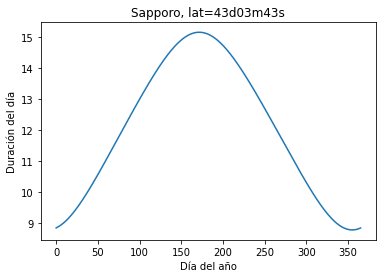

In [11]:
# Duración del día en Sapporo
plt.plot(tm, delta_T_all)
plt.title('Sapporo, lat=43d03m43s')
plt.xlabel('Día del año')
plt.ylabel('Duración del día');

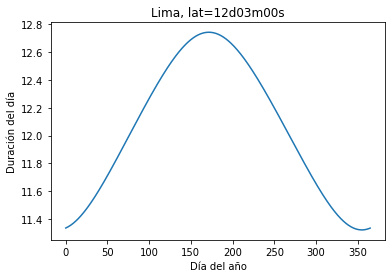

In [12]:
# Duración del día en Lima
lat_lima = Angle("12d03m00s")

cos_h_lima = -np.tan(dec) * np.tan(lat_lima)
h_all = Angle(np.arccos(cos_h_lima))
delta_T_all = 2 * h_all.hour * tsid_tu

plt.plot(tm, delta_T_all)
plt.title('Lima, lat=12d03m00s')
plt.xlabel('Día del año')
plt.ylabel('Duración del día');

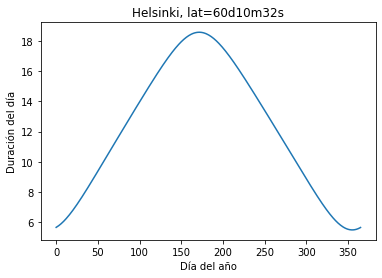

In [13]:
# Duración del día en Helsinki
lat_hel = Angle("60d10m32s")

cos_h_hel = -np.tan(dec) * np.tan(lat_hel)
h_all = Angle(np.arccos(cos_h_hel))
delta_T_all = 2 * h_all.hour * tsid_tu

plt.plot(tm, delta_T_all)
plt.title('Helsinki, lat=60d10m32s')
plt.xlabel('Día del año')
plt.ylabel('Duración del día');